In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing.csv")

#    Here: area, bedrooms, bathrooms, parking
#    (You can add more numeric cols or dummy-encode categoricals similarly)
features = ['area', 'bedrooms', 'bathrooms', 'parking']
X_df = df[features]
y = df['price'].values.reshape(-1, 1)

In [3]:
# 4. Build design matrix by prepending a column of 1’s
X = X_df.values
m, n = X.shape
X_b = np.hstack([np.ones((m, 1)), X]) 

In [5]:
# 5. Normal equation to solve for theta = [c, m1, m2, …]^T
#    θ = (Xᵀ X)⁻¹ Xᵀ y
XtX = X_b.T @ X_b
XtX_inv = np.linalg.inv(XtX)
XtY    = X_b.T @ y
theta  = XtX_inv @ XtY

c = theta[0,0]
coefs = theta[1:].flatten()



In [6]:

# 6. Predictions
y_pred = X_b @ theta

In [7]:
# 7. Evaluation
mse = np.mean((y - y_pred)**2)
ss_tot = np.sum((y - y.mean())**2)
ss_res = np.sum((y - y_pred)**2)
r2   = 1 - (ss_res/ss_tot)


In [8]:
# 8. Output results
print("Intercept (c):      ", f"{c:.4f}")
for name, coef in zip(features, coefs):
    print(f"Coef for {name:>10s}: {coef:10.4f}")

print("\nModel performance:")
print(f"  • Mean Squared Error: {mse:.2f}")
print(f"  • R² Score:           {r2:.4f}")

Intercept (c):       -41716.9347
Coef for       area:   332.7059
Coef for   bedrooms: 384167.6035
Coef for  bathrooms: 1328910.5074
Coef for    parking: 355295.3697

Model performance:
  • Mean Squared Error: 1710682813686.49
  • R² Score:           0.5101


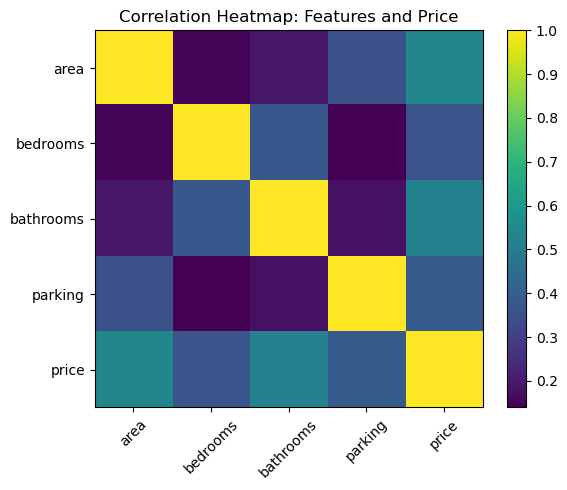

In [11]:
features = ["area", "bedrooms", "bathrooms", "parking", "price"]
corr2 = df[features].corr()

plt.figure(figsize=(6, 5))
plt.imshow(corr2, interpolation="nearest", aspect="auto")
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=45)
plt.yticks(range(len(features)), features)
plt.title("Correlation Heatmap: Features and Price")
plt.tight_layout()
plt.show()